In [3]:
# Import main lybraries
import numpy as np
import pandas as pd
%matplotlib inLine
import matplotlib.pyplot as plt
import seaborn as sns

# Import phik for correlation report
import phik
from phik.report import plot_correlation_matrix
from phik import report

# Import encoders
from sklearn.impute import SimpleImputer
from category_encoders import TargetEncoder

import statistics

In [4]:
#Load dataframe
CO2_init = pd.read_csv("data/raw/CO2_passenger_cars.csv",
                       sep=";", low_memory=False)


In [143]:
############################## DATA EXPLORATIVE ANALYSIS AND PRE-PROCESSING ##################################

In [ ]:
                             ###########   Explorative Analyse    ###############

In [5]:
# Shape of dataframe
CO2_init.shape

(1048575, 33)

In [6]:
CO2_init.head(10)

,ID,MS,Mp,VFN,Mh,Man,MMS,TAN,T,Va,...,Fm,ec (cm3),ep (KW),z (Wh/km),It,Ernedc (g/km),Erwltp (g/km),De,Vf,r
0,3034815,FR,RENAULT,NaN,RENAULT,RENAULT SAS,RENAULT,E2*2001/116*0327*80,R,2RAJ,...,M,1461.0,66.0,NaN,NaN,NaN,NaN,NaN,NaN,1
1,3034852,FR,RENAULT,NaN,RENAULT,RENAULT SAS,RENAULT,E2*2001/116*0327*80,R,2RAJ,...,M,1461.0,66.0,NaN,NaN,NaN,NaN,NaN,NaN,1
2,3034859,FR,RENAULT,NaN,RENAULT,RENAULT SAS,RENAULT,E2*2001/116*0327*80,R,2RAJ,...,M,1461.0,66.0,NaN,NaN,NaN,NaN,NaN,NaN,1
3,3034866,FR,RENAULT,NaN,RENAULT,RENAULT SAS,RENAULT,E2*2001/116*0327*80,R,2RAJ,...,M,1461.0,66.0,NaN,NaN,NaN,NaN,NaN,NaN,1
4,3034873,FR,RENAULT,NaN,RENAULT,RENAULT SAS,RENAULT,E2*2001/116*0327*80,R,2RAJ,...,M,1461.0,66.0,NaN,NaN,NaN,NaN,NaN,NaN,1
5,3034951,FR,RENAULT,NaN,RENAULT,RENAULT SAS,RENAULT SAS,E2*2007/46*0475*04,RFE,HF2,...,M,1197.0,96.0,NaN,NaN,NaN,NaN,NaN,NaN,1
6,3034957,FR,RENAULT,NaN,RENAULT,RENAULT SAS,RENAULT SAS,E2*2007/46*0475*04,RFE,HF2,...,M,1197.0,96.0,NaN,NaN,NaN,NaN,NaN,NaN,1
7,3034963,FR,RENAULT,NaN,RENAULT,RENAULT SAS,RENAULT SAS,E2*2007/46*0475*04,RFE,HF2,...,M,1197.0,96.0,NaN,NaN,NaN,NaN,NaN,NaN,1
8,3044658,FR,RENAULT,NaN,RENAULT,RENAULT SAS,RENAULT,E2*2001/116*0327*80,R,2RAJ,...,M,1461.0,66.0,NaN,NaN,NaN,NaN,NaN,NaN,1
9,3044666,FR,RENAULT,NaN,RENAULT,RENAULT SAS,RENAULT,E2*2001/116*0327*80,R,2RAJ,...,M,1461.0,66.0,NaN,NaN,NaN,NaN,NaN,NaN,1


In [8]:
# Only german registered vehicles to be considered
CO2_init_DE = CO2_init.loc[CO2_init['MS'] == 'DE']

In [9]:
CO2_init_DE

,ID,MS,Mp,VFN,Mh,Man,MMS,TAN,T,Va,...,Fm,ec (cm3),ep (KW),z (Wh/km),It,Ernedc (g/km),Erwltp (g/km),De,Vf,r
3334,1384251,DE,VW GROUP PC,NaN,SEAT,SEAT SA,SEAT (E),E9*2001/116*0067*37,6J,SCCJZD,...,M,1197.0,81.0,NaN,NaN,NaN,NaN,NaN,NaN,39
12419,1407134,DE,VW GROUP PC,NaN,VOLKSWAGEN,VOLKSWAGEN AG,VOLKSWAGEN-VW,E1*2007/46*0623*20,AU,GAC4CXXBX0,...,M,1598.0,81.0,NaN,NaN,NaN,NaN,NaN,NaN,119
12429,1373238,DE,VW GROUP PC,NaN,VOLKSWAGEN,VOLKSWAGEN AG,VOLKSWAGEN-VW,E1*2007/46*0623*30,AU,GAC4CHZCX0,...,M,999.0,81.0,NaN,NaN,NaN,NaN,NaN,NaN,13
12430,1392127,DE,VW GROUP PC,NaN,VOLKSWAGEN,VOLKSWAGEN AG,VOLKSWAGEN-VW,E1*2007/46*0627*28,AUV,VACDDYAX0,...,M,1598.0,85.0,NaN,NaN,NaN,NaN,NaN,NaN,15
12435,1364262,DE,VW GROUP PC,NaN,VOLKSWAGEN,VOLKSWAGEN AG,VOLKSWAGEN-VW,E1*2007/46*0623*22,AU,GAC45CZEAX0,...,M,1395.0,110.0,NaN,NaN,NaN,NaN,NaN,NaN,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1045283,1375229,DE,VW GROUP PC,NaN,VOLKSWAGEN,VOLKSWAGEN AG,VOLKSWAGEN-VW,E1*2001/116*0252*49,2K,AFDFSFX0,...,M,1968.0,55.0,NaN,NaN,NaN,NaN,NaN,NaN,2
1045285,1376822,DE,VW GROUP PC,NaN,VOLKSWAGEN,VOLKSWAGEN AG,VOLKSWAGEN-VW,E1*2007/46*0623*31,AU,GAC4DLBAX0,...,M,1984.0,180.0,NaN,NaN,NaN,NaN,NaN,NaN,39
1045286,1352974,DE,VW GROUP PC,NaN,VOLKSWAGEN,VOLKSWAGEN AG,VOLKSWAGEN-VW,E1*2001/116*0220*44,7HC,MCXHA308X0,...,M,1968.0,110.0,NaN,NaN,NaN,NaN,NaN,NaN,2
1045287,1404304,DE,VW GROUP PC,NaN,VOLKSWAGEN,VOLKSWAGEN AG,VOLKSWAGEN-VW,E1*2007/46*0539*23,16,ABCZDAX0,...,M,1395.0,110.0,NaN,NaN,NaN,NaN,NaN,NaN,3


In [10]:
CO2_init_DE.shape

(19600, 33)

In [11]:
# Dataframe information
CO2_init.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1048575 entries, 0 to 1048574
Data columns (total 33 columns):
 #   Column         Non-Null Count    Dtype  
---  ------         --------------    -----  
 0   ID             1048575 non-null  int64  
 1   MS             1048575 non-null  object 
 2   Mp             765181 non-null   object 
 3   VFN            148 non-null      object 
 4   Mh             1048575 non-null  object 
 5   Man            1048575 non-null  object 
 6   MMS            988697 non-null   object 
 7   TAN            1046891 non-null  object 
 8   T              1048198 non-null  object 
 9   Va             1046798 non-null  object 
 10  Ve             1044682 non-null  object 
 11  Mk             1047215 non-null  object 
 12  Cn             1048315 non-null  object 
 13  Ct             1048573 non-null  object 
 14  Cr             793126 non-null   object 
 15  m (kg)         1048518 non-null  float64
 16  Mt             213 non-null      float64
 17  Enedc (g

In [12]:
                          ###########   Feature Selection    ###############

In [13]:
# Several feature visualization to feature selection

In [17]:
CO2_init["T"].value_counts()

R        74929
C        45694
SD       39738
M        27778
S        23401
         ...  
6S31         1
6S72         1
6T51         1
6T91         1
LD 90        1
Name: T, Length: 1097, dtype: int64

In [18]:
CO2_init["Ct"].value_counts() 

M1     1033644
M1G       9809
M1        4180
m1         929
N1          10
N1G          1
Name: Ct, dtype: int64

In [19]:
CO2_init["VFN"].value_counts()

IP-02-VF3-2017-2240    65
IP-02-VF3-2017-3120    35
IP-02-VF3-2017-2420    25
IP-02-VF3-2017-2140    21
IP-02-VF3-2017-3240     1
IP-02-VF3-2017-2120     1
Name: VFN, dtype: int64

In [20]:
# Features to be deleted of dataframe
CO2_raw_raw = CO2_init_DE.drop(columns=['Cn','MS','ID', 'VFN', 'Mh', 'MMS', 'TAN', 'Man','Va', 'Ve','Mt', 'Ewltp (g/km)', 'Ernedc (g/km)', 'Erwltp (g/km)', 'De', 'Vf', 'r','Ct', 'Cr', 'It', 'T', 'z (Wh/km)'])

In [21]:
# Phik corrlation overview
phik_overview = CO2_raw_raw.phik_matrix()
phik_overview.round(2)

interval columns not set, guessing: ['m (kg)', 'Enedc (g/km)', 'W (mm)', 'At1 (mm)', 'At2 (mm)', 'ec (cm3)', 'ep (KW)']


,Mp,Mk,m (kg),Enedc (g/km),W (mm),At1 (mm),At2 (mm),Ft,Fm,ec (cm3),ep (KW)
Mp,1.00,1.00,0.41,0.24,0.43,0.53,0.48,0.31,0.11,0.50,0.31
Mk,1.00,1.00,0.74,0.88,0.87,0.80,0.78,0.50,0.50,0.90,0.85
m (kg),0.41,0.74,1.00,0.51,0.67,0.84,0.76,0.32,0.11,0.72,0.39
Enedc (g/km),0.24,0.88,0.51,1.00,0.36,0.44,0.57,0.60,0.77,0.80,0.75
W (mm),0.43,0.87,0.67,0.36,1.00,0.74,0.71,0.28,0.14,0.50,0.24
At1 (mm),0.53,0.80,0.84,0.44,0.74,1.00,0.97,0.31,0.28,0.56,0.30
At2 (mm),0.48,0.78,0.76,0.57,0.71,0.97,1.00,0.29,0.25,0.52,0.30
Ft,0.31,0.50,0.32,0.60,0.28,0.31,0.29,1.00,0.84,0.42,0.33
Fm,0.11,0.50,0.11,0.77,0.14,0.28,0.25,0.84,1.00,0.03,0.06
ec (cm3),0.50,0.90,0.72,0.80,0.50,0.56,0.52,0.42,0.03,1.00,0.83


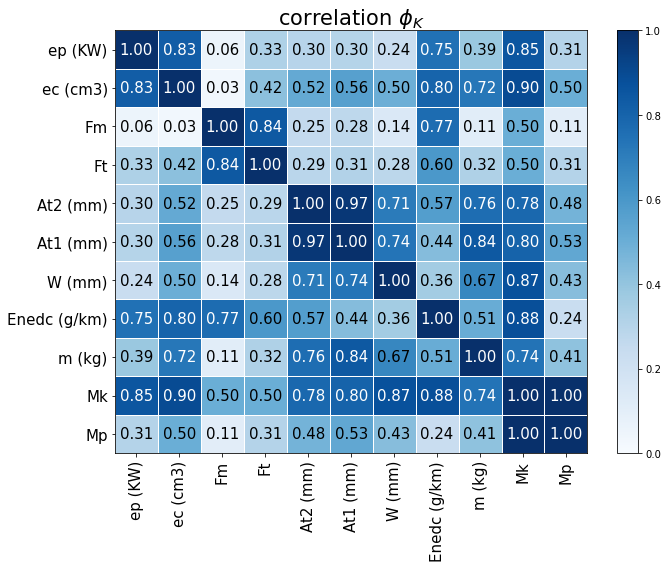

In [22]:
plot_correlation_matrix(phik_overview.values, 
                        x_labels=phik_overview.columns, 
                        y_labels=phik_overview.index, 
                        vmin=0, vmax=1, color_map="Blues", 
                        title=r"correlation $\phi_K$", 
                        fontsize_factor=1.5, 
                        figsize=(10, 8))
plt.tight_layout()

In [23]:
# Final features to be deleted
CO2_raw = CO2_init_DE.drop(columns=['MS','ID', 'VFN', 'Mh', 'MMS', 'TAN', 'Man','Va', 'Ve','Mt', 'Ewltp (g/km)', 'Ernedc (g/km)', 'Erwltp (g/km)', 'De', 'Vf', 'r', 'At2 (mm)', 'Ct', 'Cr', 'It', 'T', 'z (Wh/km)'])

In [24]:
# New dataframe
CO2_raw.head(10)

,Mp,Mk,Cn,m (kg),Enedc (g/km),W (mm),At1 (mm),Ft,Fm,ec (cm3),ep (KW)
3334,VW GROUP PC,SEAT,IBIZA,1102.0,119.0,2469.0,1465.0,PETROL,M,1197.0,81.0
12419,VW GROUP PC,VOLKSWAGEN,GOLF,1321.0,99.0,2620.0,1527.0,DIESEL,M,1598.0,81.0
12429,VW GROUP PC,VOLKSWAGEN,GOLF,1257.0,109.0,2620.0,1549.0,PETROL,M,999.0,81.0
12430,VW GROUP PC,VOLKSWAGEN,GOLF,1395.0,103.0,2620.0,1549.0,DIESEL,M,1598.0,85.0
12435,VW GROUP PC,VOLKSWAGEN,GOLF,1280.0,109.0,2620.0,1527.0,PETROL,M,1395.0,110.0
12436,VW GROUP PC,VOLKSWAGEN,JETTA,1325.0,114.0,2648.0,1541.0,PETROL,M,1197.0,77.0
12441,VW GROUP PC,VOLKSWAGEN,MULTIVAN,1946.0,155.0,3000.0,1634.0,DIESEL,M,1968.0,75.0
12442,VW GROUP PC,VOLKSWAGEN,KOMBI,2043.0,171.0,3000.0,1634.0,DIESEL,M,1968.0,150.0
12455,VW GROUP PC,VOLKSWAGEN,TIGUAN,1592.0,163.0,2677.0,1576.0,PETROL,M,1395.0,110.0
12457,VW GROUP PC,VOLKSWAGEN,GOLF,1332.0,124.0,2620.0,1533.0,PETROL,M,1395.0,110.0


In [25]:
CO2_raw.shape

(19600, 11)

In [26]:
# Visualization of fuel types and some homoganization
CO2_init["Ft"].value_counts()

PETROL                       324615
Petrol                       261698
DIESEL                       222247
Diesel                       210856
ELECTRIC                       6438
diesel                         4217
Petrol/Electric                4182
petrol                         3156
Electric                       2189
DIESEL                         2184
LPG                            2053
PETROL/ELECTRIC                1359
PETROL                         1004
NG-BIOMETHANE                   988
NG-biomethane                   735
Diesel/Electric                 270
E85                             141
electric                         91
LPG                              73
NG-biomethane                    17
Electric                         12
Hydrogen                         10
OTHER                             1
Name: Ft, dtype: int64

In [27]:
CO2_raw['Ft'] = CO2_raw['Ft'].replace(['DIESEL'],'Diesel')
CO2_raw['Ft'] = CO2_raw['Ft'].replace(['PETROL'],'Petrol')
CO2_raw['Ft'] = CO2_raw['Ft'].replace(['ELECTRIC', 'electric' ],'Electric')
CO2_raw['Ft'] = CO2_raw['Ft'].replace(['petrol'],'Petrol')
CO2_raw['Ft'] = CO2_raw['Ft'].replace(['diesel'],'Diesel')
CO2_raw['Ft'] = CO2_raw['Ft'].replace(['DIESEL                   '],'Diesel')
CO2_raw['Ft'] = CO2_raw['Ft'].replace(['PETROL                   '],'Petrol')
CO2_raw['Ft'] = CO2_raw['Ft'].replace(['Electric                 '],'Electric')
CO2_raw['Ft'] = CO2_raw['Ft'].replace(['PETROL/ELECTRIC'],'Petrol/Electric')
CO2_raw['Ft'] = CO2_raw['Ft'].replace(['LPG                      '],'LPG')
CO2_raw['Ft'] = CO2_raw['Ft'].replace(['NG-biomethane            '],'NG-biomethane')
CO2_raw['Ft'] = CO2_raw['Ft'].replace(['NG-BIOMETHANE'],'NG-biomethane')

In [28]:
CO2_raw["Ft"].value_counts()

Diesel             9920
Petrol             9095
Petrol/Electric     240
NG-biomethane       133
Electric            102
LPG                  75
Diesel/Electric      35
Name: Ft, dtype: int64

In [29]:
# Further visualization of features

In [30]:
CO2_raw["Mp"].value_counts()

DAIMLER AG           7623
VW GROUP PC          4122
GENERAL MOTORS       1789
BMW GROUP            1530
RENAULT               995
MITSUBISHI MOTORS     164
KIA                   128
SUZUKI POOL            18
Name: Mp, dtype: int64

In [31]:
CO2_raw["Mk"].value_counts()

MERCEDES-BENZ           7388
OPEL                    2786
VOLKSWAGEN              2210
BMW                     1242
AUDI                    1229
RENAULT                  709
SEAT                     668
DACIA                    294
CITROEN                  270
MAZDA                    242
MERCEDES-AMG             231
MINI                     229
PEUGEOT                  177
MITSUBISHI               157
KIA                      129
NISSAN                   112
ASTON MARTIN              64
LOTUS                     43
BMW I                     30
ROLLS-ROYCE               29
ALPINA                    24
MORGAN                    22
SUZUKI                    17
FERRARI                   16
MCLAREN                   15
DS                        10
KTM                        7
PORSCHE                    7
INFINITI                   6
FIAT                       6
LADA AUTOMOBILE GMBH       3
SMART                      3
TOYOTA                     3
MAN                        2
DONKERVOORT   

In [32]:
CO2_raw["Cn"].value_counts()

ZAFIRA TOURER    875
GOLF             662
VITO TOURER      603
V-KLASSE         599
E 220 D          390
                ... 
C 350 4MATIC       1
PEUGEOT 107        1
TOYOTA C-HR        1
DODGE DURANO       1
AMG S 63           1
Name: Cn, Length: 837, dtype: int64

In [33]:
# Statistical information of variable target
CO2_raw['Enedc (g/km)'].describe()

count    19582.000000
mean       142.326933
std         40.469425
min          0.000000
25%        118.000000
50%        137.000000
75%        158.000000
max        539.000000
Name: Enedc (g/km), dtype: float64

In [34]:
# Target versus fuel type  
grouped_data = CO2_raw.groupby('Ft')['Enedc (g/km)']
grouped_data.describe()

,count,mean,std,min,25%,50%,75%,max
Ft,,,,,,,,
Diesel,9918.0,135.959468,27.457422,22.0,114.0,130.0,156.0,309.0
Diesel/Electric,35.0,94.200000,18.194699,49.0,99.0,100.0,104.0,106.0
Electric,102.0,0.000000,0.000000,0.0,0.0,0.0,0.0,0.0
LPG,74.0,162.635135,81.646679,109.0,118.0,143.0,149.0,413.0
NG-biomethane,133.0,119.338346,24.448736,79.0,109.0,116.0,136.0,267.0
Petrol,9080.0,153.525991,44.842370,55.0,127.0,142.0,167.0,539.0
Petrol/Electric,240.0,55.750000,26.795444,12.0,49.0,53.0,59.0,164.0


In [35]:
# Graphics of several features vs target

In [36]:
CO2_raw['Ft'] = CO2_raw['Ft'].replace(['PETROL/ELECTRIC'],'Petrol/Electric')

/var/folders/5v/x5bgf8yj34q8c1bw3hrcktcm0000gn/T/ipykernel_10465/260668963.py:8: UserWarning: Tight layout not applied. The bottom and top margins cannot be made large enough to accommodate all axes decorations. 
  plt.tight_layout()


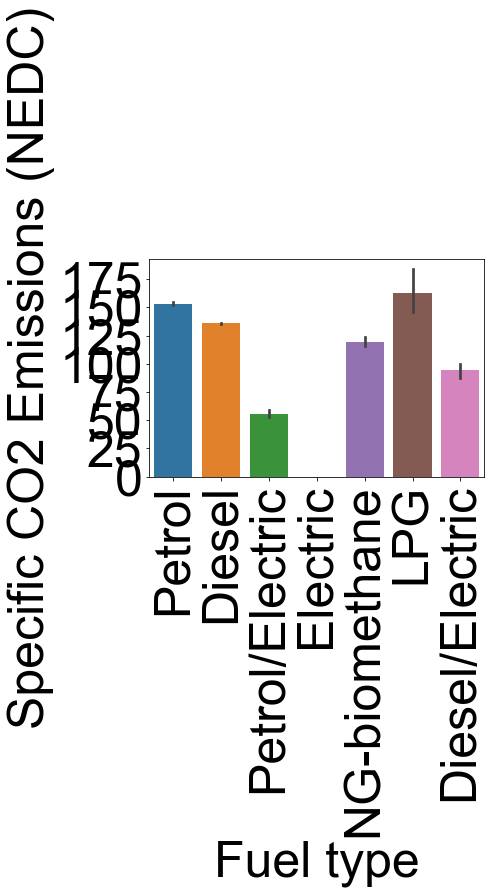

In [37]:
sns.barplot(x="Ft",y="Enedc (g/km)",data=CO2_raw)
sns.set(rc = {'figure.figsize':(50,20)})
plt.xticks(rotation=90)
plt.xticks(fontsize=50)
plt.yticks(fontsize=50)
plt.xlabel('Fuel type', fontsize=50);
plt.ylabel('Specific CO2 Emissions (NEDC)', fontsize=50);
plt.tight_layout()

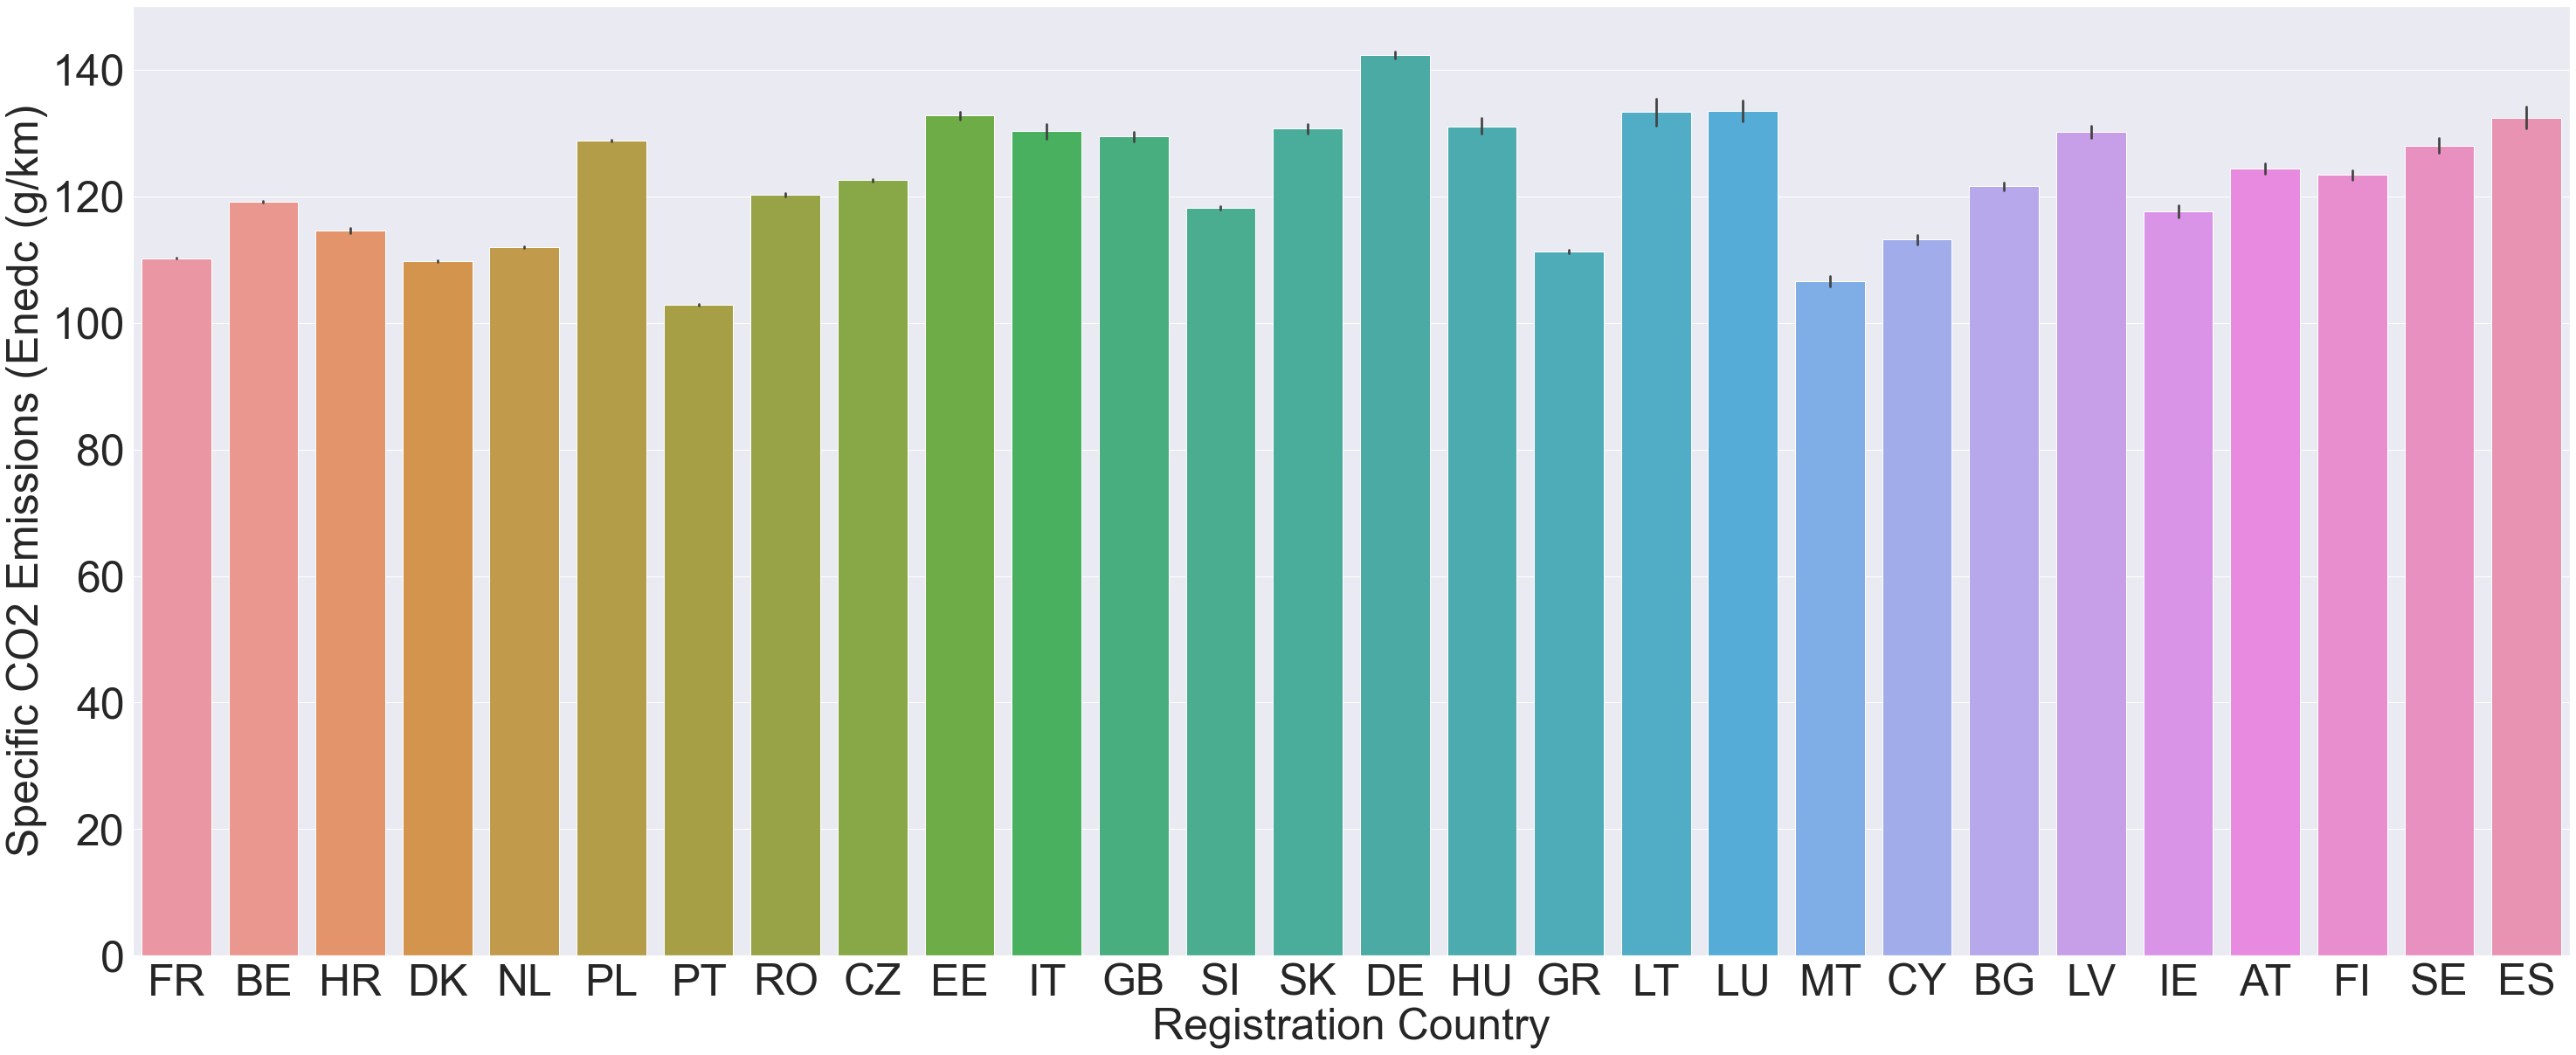

In [38]:
sns.barplot(x="MS",y="Enedc (g/km)",data=CO2_init)
sns.set(rc = {'figure.figsize':(40,30)})
plt.xticks(fontsize=50)
plt.yticks(fontsize=50)
plt.xlabel('Registration Country', fontsize=50);
plt.ylabel('Specific CO2 Emissions (Enedc (g/km)', fontsize=50);
plt.show()

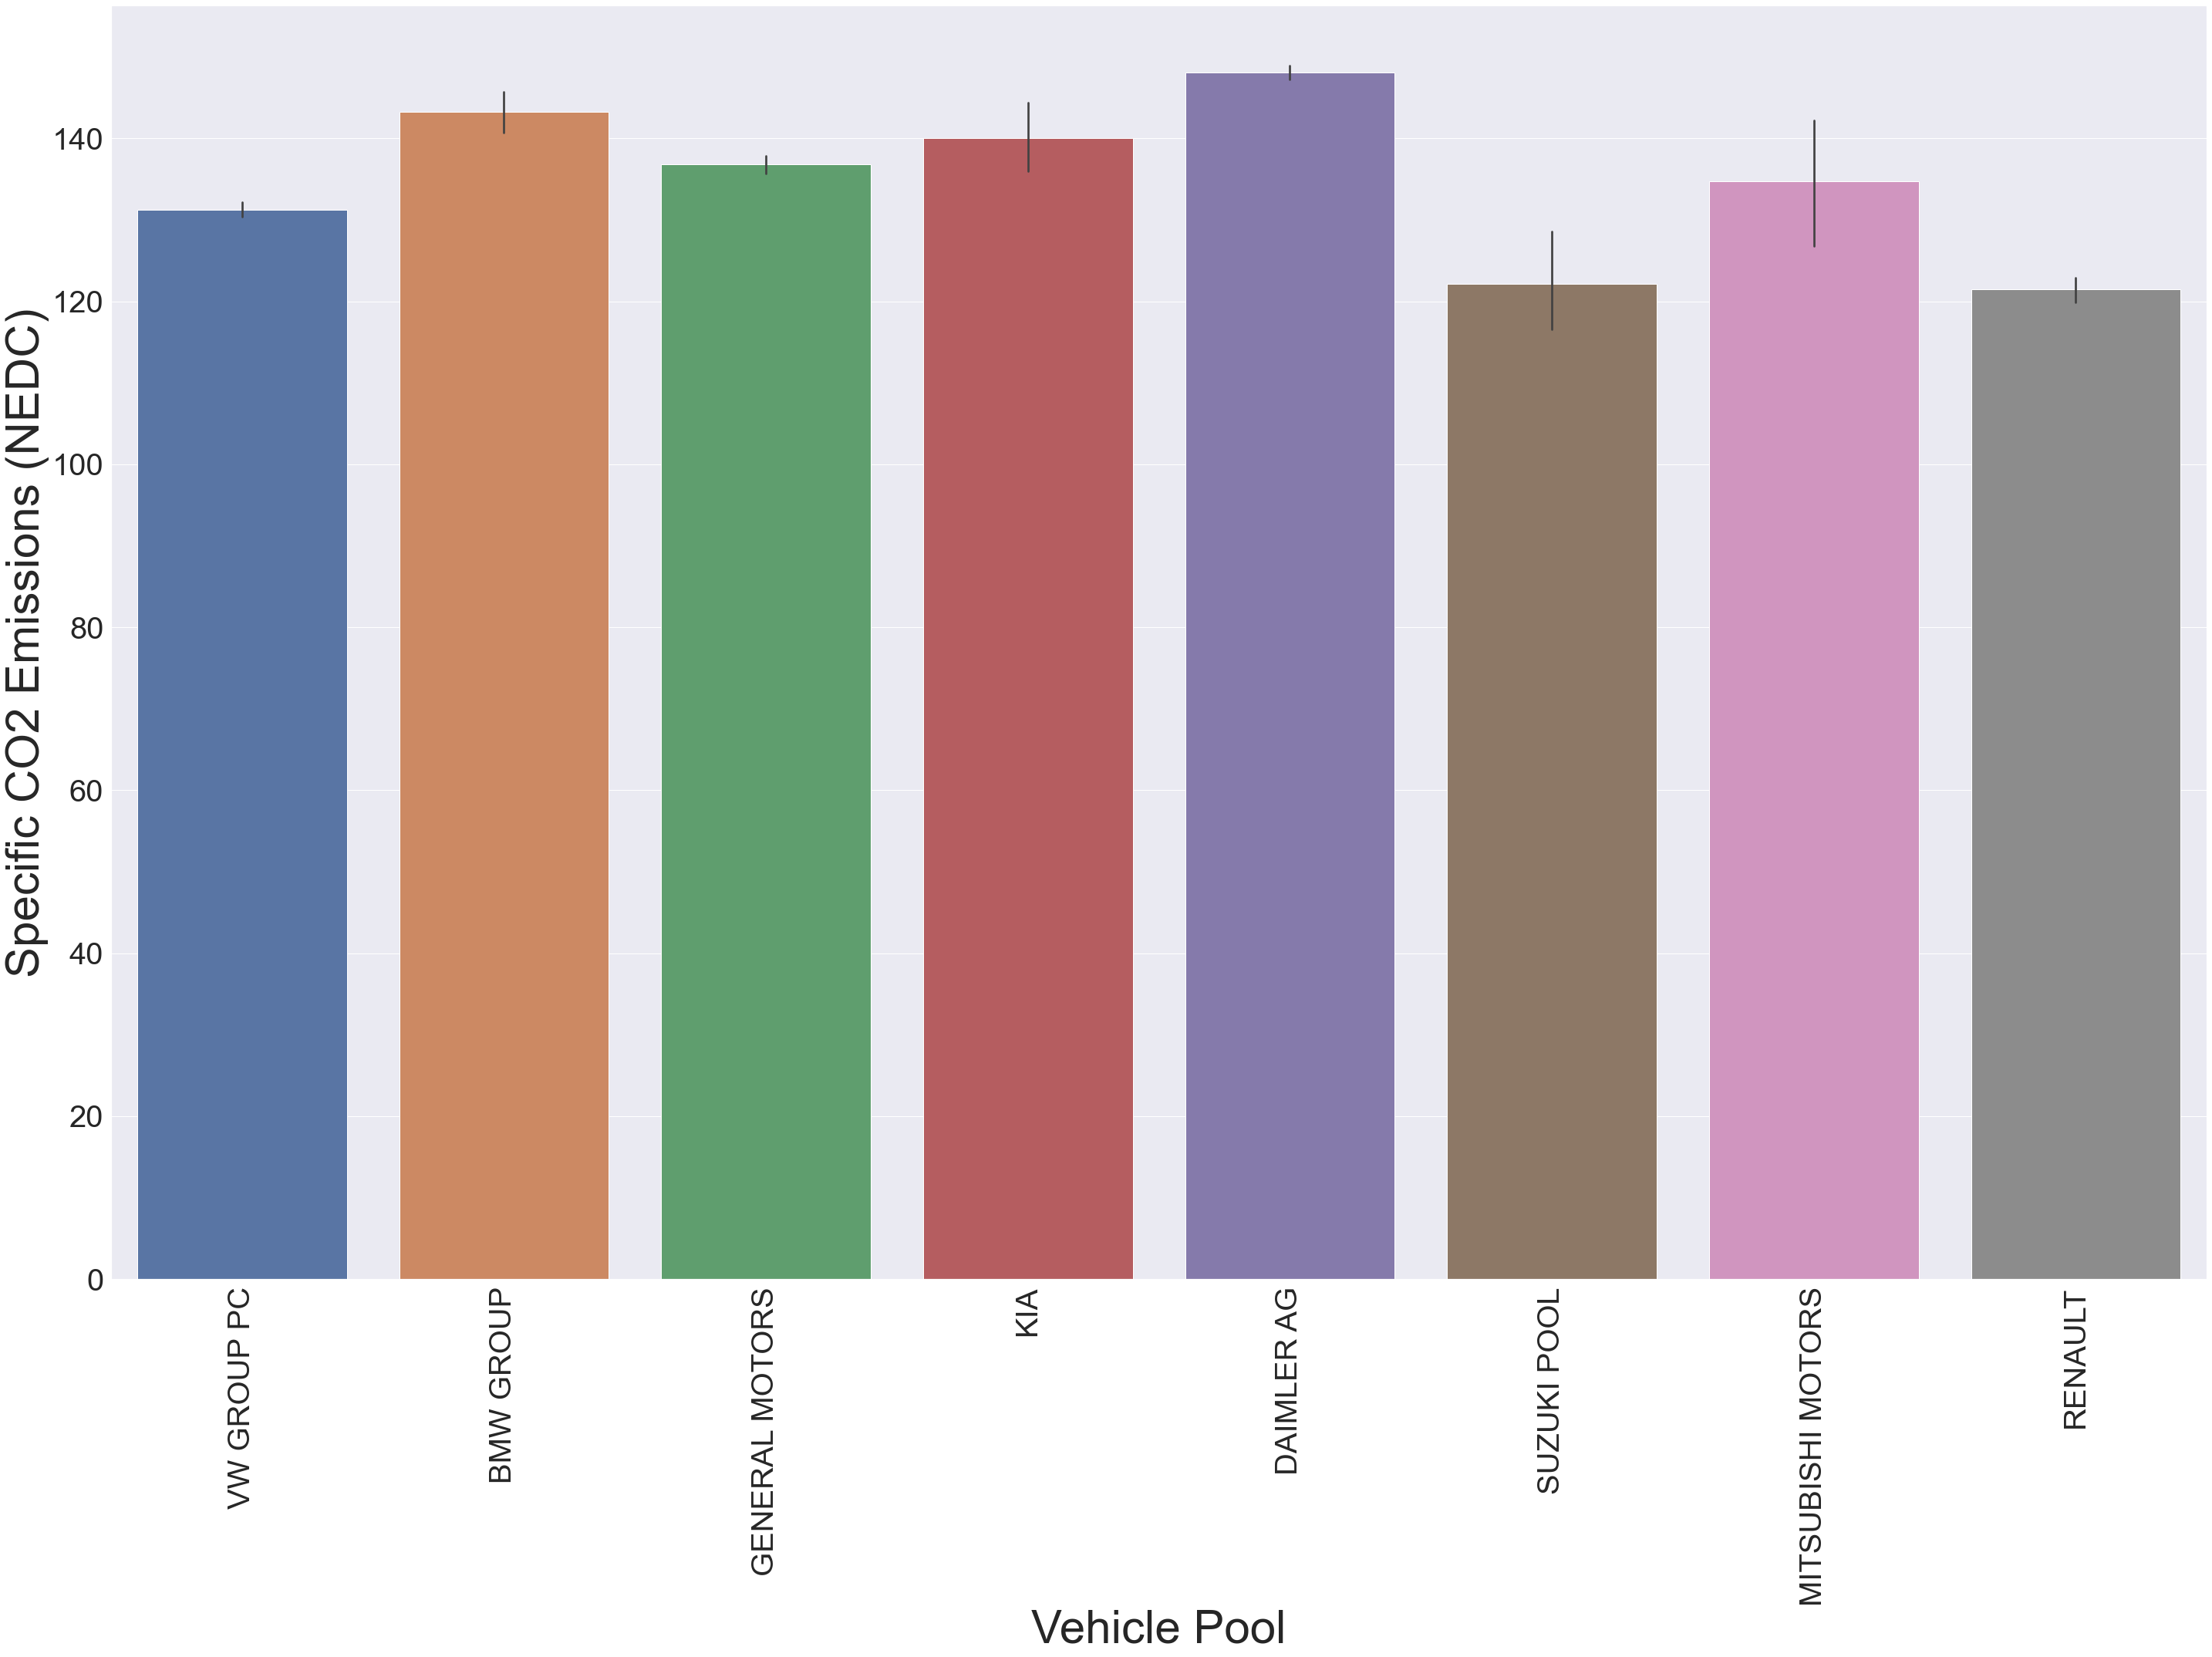

In [39]:
sns.barplot(x="Mp",y="Enedc (g/km)",data=CO2_raw)
sns.set(rc = {'figure.figsize':(50,20)})
plt.xticks(rotation=90)
plt.xticks(fontsize=40)
plt.yticks(fontsize=40)
plt.xlabel('Vehicle Pool', fontsize=60);
plt.ylabel('Specific CO2 Emissions (NEDC)', fontsize=60);
plt.tight_layout()

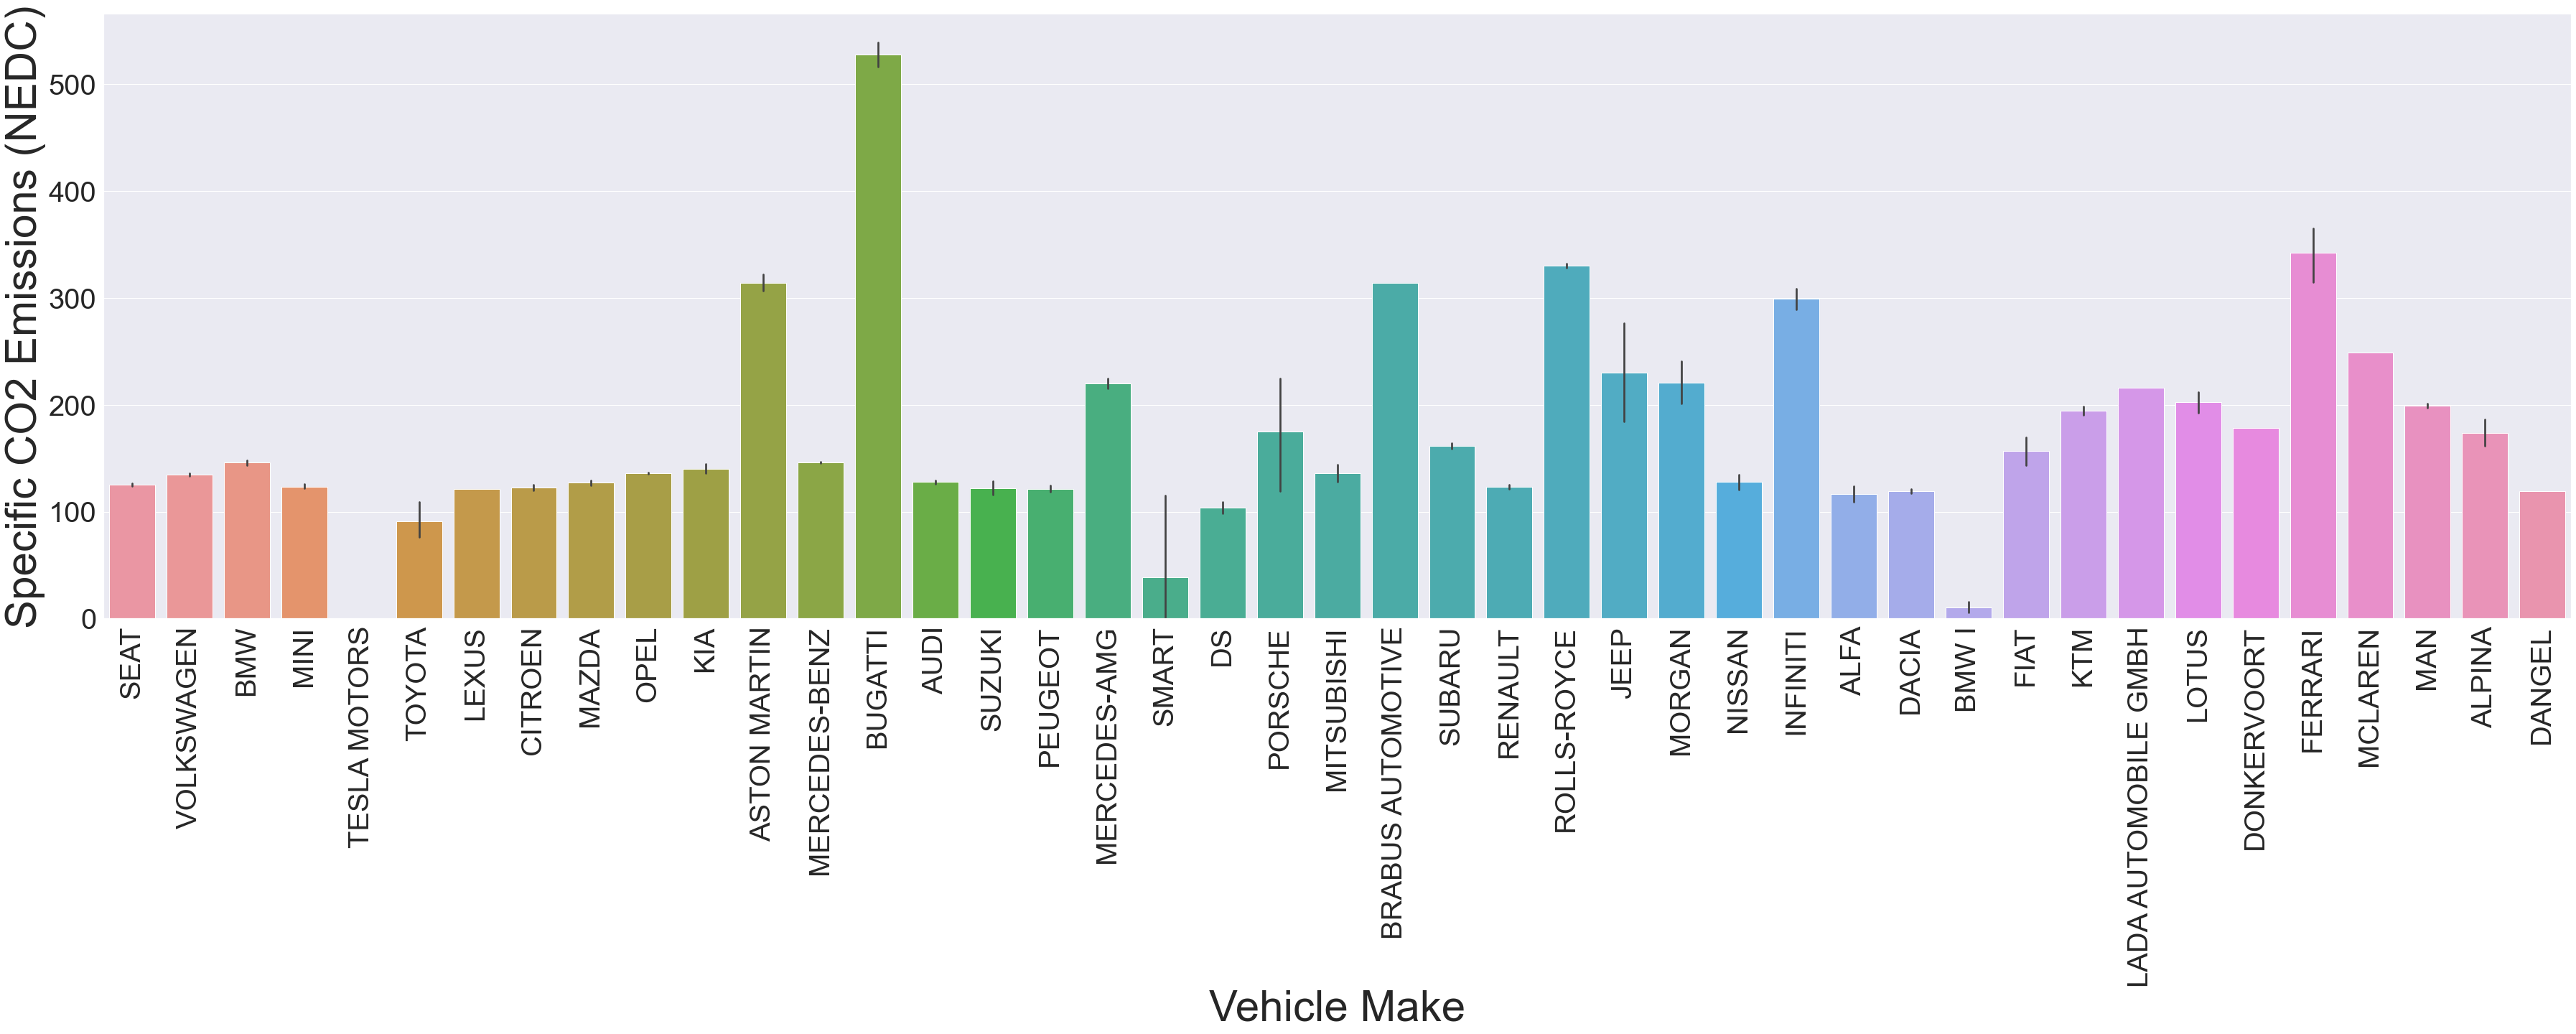

In [40]:
sns.barplot(x="Mk",y="Enedc (g/km)",data=CO2_raw)
sns.set(rc = {'figure.figsize':(50,20)})
plt.xticks(rotation=90)
plt.xticks(fontsize=40)
plt.yticks(fontsize=40)
plt.xlabel('Vehicle Make', fontsize=60);
plt.ylabel('Specific CO2 Emissions (NEDC)', fontsize=60);
plt.tight_layout()

In [41]:
CO2_raw_final = CO2_raw.drop(columns=['Cn'])
CO2_raw_final.shape

(19600, 10)

/var/folders/5v/x5bgf8yj34q8c1bw3hrcktcm0000gn/T/ipykernel_10465/1939862538.py:4: UserWarning: To output multiple subplots, the figure containing the passed axes is being cleared.
  CO2_raw_final.hist(ax = ax)


array([[<AxesSubplot:title={'center':'m (kg)'}>,
        <AxesSubplot:title={'center':'Enedc (g/km)'}>],
       [<AxesSubplot:title={'center':'W (mm)'}>,
        <AxesSubplot:title={'center':'At1 (mm)'}>],
       [<AxesSubplot:title={'center':'ec (cm3)'}>,
        <AxesSubplot:title={'center':'ep (KW)'}>]], dtype=object)

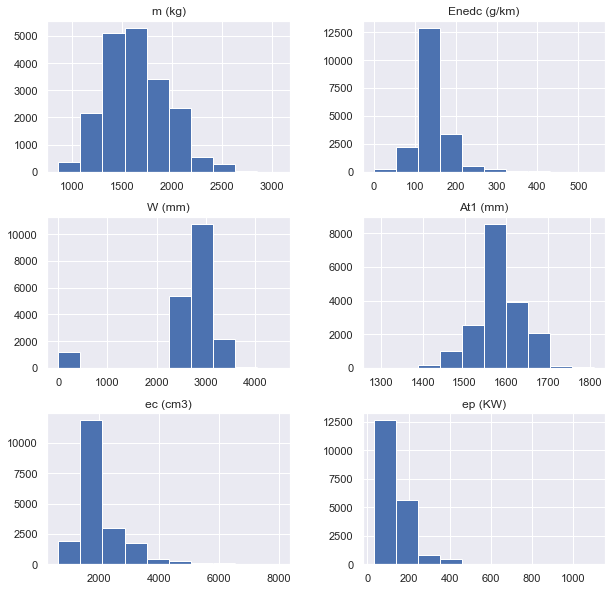

In [42]:
# Histograms of the features
fig = plt.figure(figsize = (10,10))
ax = fig.gca()
CO2_raw_final.hist(ax = ax)

In [43]:
                            ###########   Pre-processing    ###############

In [57]:
# A MISSING VALUES

In [58]:
# Missing values fer feature
CO2_raw_final.isna().sum()

Mp              0
Mk              0
m (kg)          0
Enedc (g/km)    0
W (mm)          0
At1 (mm)        0
Ft              0
Fm              0
ec (cm3)        0
ep (KW)         0
dtype: int64

In [59]:
# Showing categorical values
cat = CO2_raw_final.select_dtypes(include='O').keys()
cat

Index(['Mp', 'Ft', 'Fm'], dtype='object')

In [60]:
# Imputing missing categorical values
imp_most_frequent = SimpleImputer(strategy='most_frequent')
for_imputing_cat = ['Mp', 'Mk']
for feature in for_imputing_cat:
    CO2_raw_final[feature] = imp_most_frequent.fit_transform(CO2_raw_final[feature].to_numpy().reshape(-1,1))

In [61]:
CO2_raw_final.isna().sum()

Mp              0
Mk              0
m (kg)          0
Enedc (g/km)    0
W (mm)          0
At1 (mm)        0
Ft              0
Fm              0
ec (cm3)        0
ep (KW)         0
dtype: int64

In [62]:
# Imputing numerical values
for_imputing_num = ['m (kg)','Enedc (g/km)','W (mm)', 'At1 (mm)','ec (cm3)', 'ep (KW)']
for feature in for_imputing_num:
    CO2_raw_final[feature] = CO2_raw_final[feature].fillna(CO2_raw_final[feature].median())  

In [63]:
CO2_raw_final.isna().sum()

Mp              0
Mk              0
m (kg)          0
Enedc (g/km)    0
W (mm)          0
At1 (mm)        0
Ft              0
Fm              0
ec (cm3)        0
ep (KW)         0
dtype: int64

In [64]:
CO2_raw_final.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 19600 entries, 3334 to 1045288
Data columns (total 10 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   Mp            19600 non-null  object 
 1   Mk            19600 non-null  float64
 2   m (kg)        19600 non-null  float64
 3   Enedc (g/km)  19600 non-null  float64
 4   W (mm)        19600 non-null  float64
 5   At1 (mm)      19600 non-null  float64
 6   Ft            19600 non-null  object 
 7   Fm            19600 non-null  object 
 8   ec (cm3)      19600 non-null  float64
 9   ep (KW)       19600 non-null  float64
dtypes: float64(7), object(3)
memory usage: 1.6+ MB


In [65]:
# B CATEGORICAL VALUES

In [66]:
cat = CO2_raw_final.select_dtypes(include='O').keys()
cat

Index(['Mp', 'Ft', 'Fm'], dtype='object')

In [67]:
# Encoding vehicle makes
encoder = TargetEncoder(smoothing=8, min_samples_leaf=5)
CO2_raw_final['Mk'] = encoder.fit_transform(CO2_raw_final['Mk'], CO2_raw_final['Enedc (g/km)'])
CO2_raw_final.head(10)

,Mp,Mk,m (kg),Enedc (g/km),W (mm),At1 (mm),Ft,Fm,ec (cm3),ep (KW)
3334,VW GROUP PC,124.985030,1102.0,119.0,2469.0,1465.0,Petrol,M,1197.0,81.0
12419,VW GROUP PC,134.535294,1321.0,99.0,2620.0,1527.0,Diesel,M,1598.0,81.0
12429,VW GROUP PC,134.535294,1257.0,109.0,2620.0,1549.0,Petrol,M,999.0,81.0
12430,VW GROUP PC,134.535294,1395.0,103.0,2620.0,1549.0,Diesel,M,1598.0,85.0
12435,VW GROUP PC,134.535294,1280.0,109.0,2620.0,1527.0,Petrol,M,1395.0,110.0
12436,VW GROUP PC,134.535294,1325.0,114.0,2648.0,1541.0,Petrol,M,1197.0,77.0
12441,VW GROUP PC,134.535294,1946.0,155.0,3000.0,1634.0,Diesel,M,1968.0,75.0
12442,VW GROUP PC,134.535294,2043.0,171.0,3000.0,1634.0,Diesel,M,1968.0,150.0
12455,VW GROUP PC,134.535294,1592.0,163.0,2677.0,1576.0,Petrol,M,1395.0,110.0
12457,VW GROUP PC,134.535294,1332.0,124.0,2620.0,1533.0,Petrol,M,1395.0,110.0


In [68]:
# ***** Dictionary to be created for new instances

In [69]:
CO2_raw_final['Ft'] = CO2_raw_final['Ft'].replace(['PETROL/ELECTRIC'],'Petrol/Electric')

In [70]:
# Encoding the rest of categorical features
def one_hot_encoding(df, col_name):
    
    #Applies one-hot encoding by col_name to the df.
    #:param df: data frame;
    #:param col_name: name of the columns to be one-hot encoded;
    #:return: data frame with new columns.

    one_hot = pd.get_dummies(df[col_name])
    # Drop the column as it is now encoded:
    df = df.drop(col_name, axis=1)
    # Join the encoded data frame:
    return df.join(one_hot)

In [71]:
CO2_prep_enc = one_hot_encoding(CO2_raw_final,["Mp","Fm","Ft"])

In [72]:
print(CO2_prep_enc.columns)

Index(['Mk', 'm (kg)', 'Enedc (g/km)', 'W (mm)', 'At1 (mm)', 'ec (cm3)',
       'ep (KW)', 'Mp_BMW GROUP', 'Mp_DAIMLER AG', 'Mp_GENERAL MOTORS',
       'Mp_KIA', 'Mp_MITSUBISHI MOTORS', 'Mp_RENAULT', 'Mp_SUZUKI POOL',
       'Mp_VW GROUP PC', 'Fm_B', 'Fm_E', 'Fm_M', 'Ft_Diesel',
       'Ft_Diesel/Electric', 'Ft_Electric', 'Ft_LPG', 'Ft_NG-biomethane',
       'Ft_Petrol', 'Ft_Petrol/Electric'],
      dtype='object')


In [73]:
# New dataframe
CO2_prep_enc.head(10)

,Mk,m (kg),Enedc (g/km),W (mm),At1 (mm),ec (cm3),ep (KW),Mp_BMW GROUP,Mp_DAIMLER AG,Mp_GENERAL MOTORS,...,Fm_B,Fm_E,Fm_M,Ft_Diesel,Ft_Diesel/Electric,Ft_Electric,Ft_LPG,Ft_NG-biomethane,Ft_Petrol,Ft_Petrol/Electric
3334,124.985030,1102.0,119.0,2469.0,1465.0,1197.0,81.0,0,0,0,...,0,0,1,0,0,0,0,0,1,0
12419,134.535294,1321.0,99.0,2620.0,1527.0,1598.0,81.0,0,0,0,...,0,0,1,1,0,0,0,0,0,0
12429,134.535294,1257.0,109.0,2620.0,1549.0,999.0,81.0,0,0,0,...,0,0,1,0,0,0,0,0,1,0
12430,134.535294,1395.0,103.0,2620.0,1549.0,1598.0,85.0,0,0,0,...,0,0,1,1,0,0,0,0,0,0
12435,134.535294,1280.0,109.0,2620.0,1527.0,1395.0,110.0,0,0,0,...,0,0,1,0,0,0,0,0,1,0
12436,134.535294,1325.0,114.0,2648.0,1541.0,1197.0,77.0,0,0,0,...,0,0,1,0,0,0,0,0,1,0
12441,134.535294,1946.0,155.0,3000.0,1634.0,1968.0,75.0,0,0,0,...,0,0,1,1,0,0,0,0,0,0
12442,134.535294,2043.0,171.0,3000.0,1634.0,1968.0,150.0,0,0,0,...,0,0,1,1,0,0,0,0,0,0
12455,134.535294,1592.0,163.0,2677.0,1576.0,1395.0,110.0,0,0,0,...,0,0,1,0,0,0,0,0,1,0
12457,134.535294,1332.0,124.0,2620.0,1533.0,1395.0,110.0,0,0,0,...,0,0,1,0,0,0,0,0,1,0


In [74]:
CO2_prep_enc.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 19600 entries, 3334 to 1045288
Data columns (total 25 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   Mk                    19600 non-null  float64
 1   m (kg)                19600 non-null  float64
 2   Enedc (g/km)          19600 non-null  float64
 3   W (mm)                19600 non-null  float64
 4   At1 (mm)              19600 non-null  float64
 5   ec (cm3)              19600 non-null  float64
 6   ep (KW)               19600 non-null  float64
 7   Mp_BMW GROUP          19600 non-null  uint8  
 8   Mp_DAIMLER AG         19600 non-null  uint8  
 9   Mp_GENERAL MOTORS     19600 non-null  uint8  
 10  Mp_KIA                19600 non-null  uint8  
 11  Mp_MITSUBISHI MOTORS  19600 non-null  uint8  
 12  Mp_RENAULT            19600 non-null  uint8  
 13  Mp_SUZUKI POOL        19600 non-null  uint8  
 14  Mp_VW GROUP PC        19600 non-null  uint8  
 15  Fm_B          

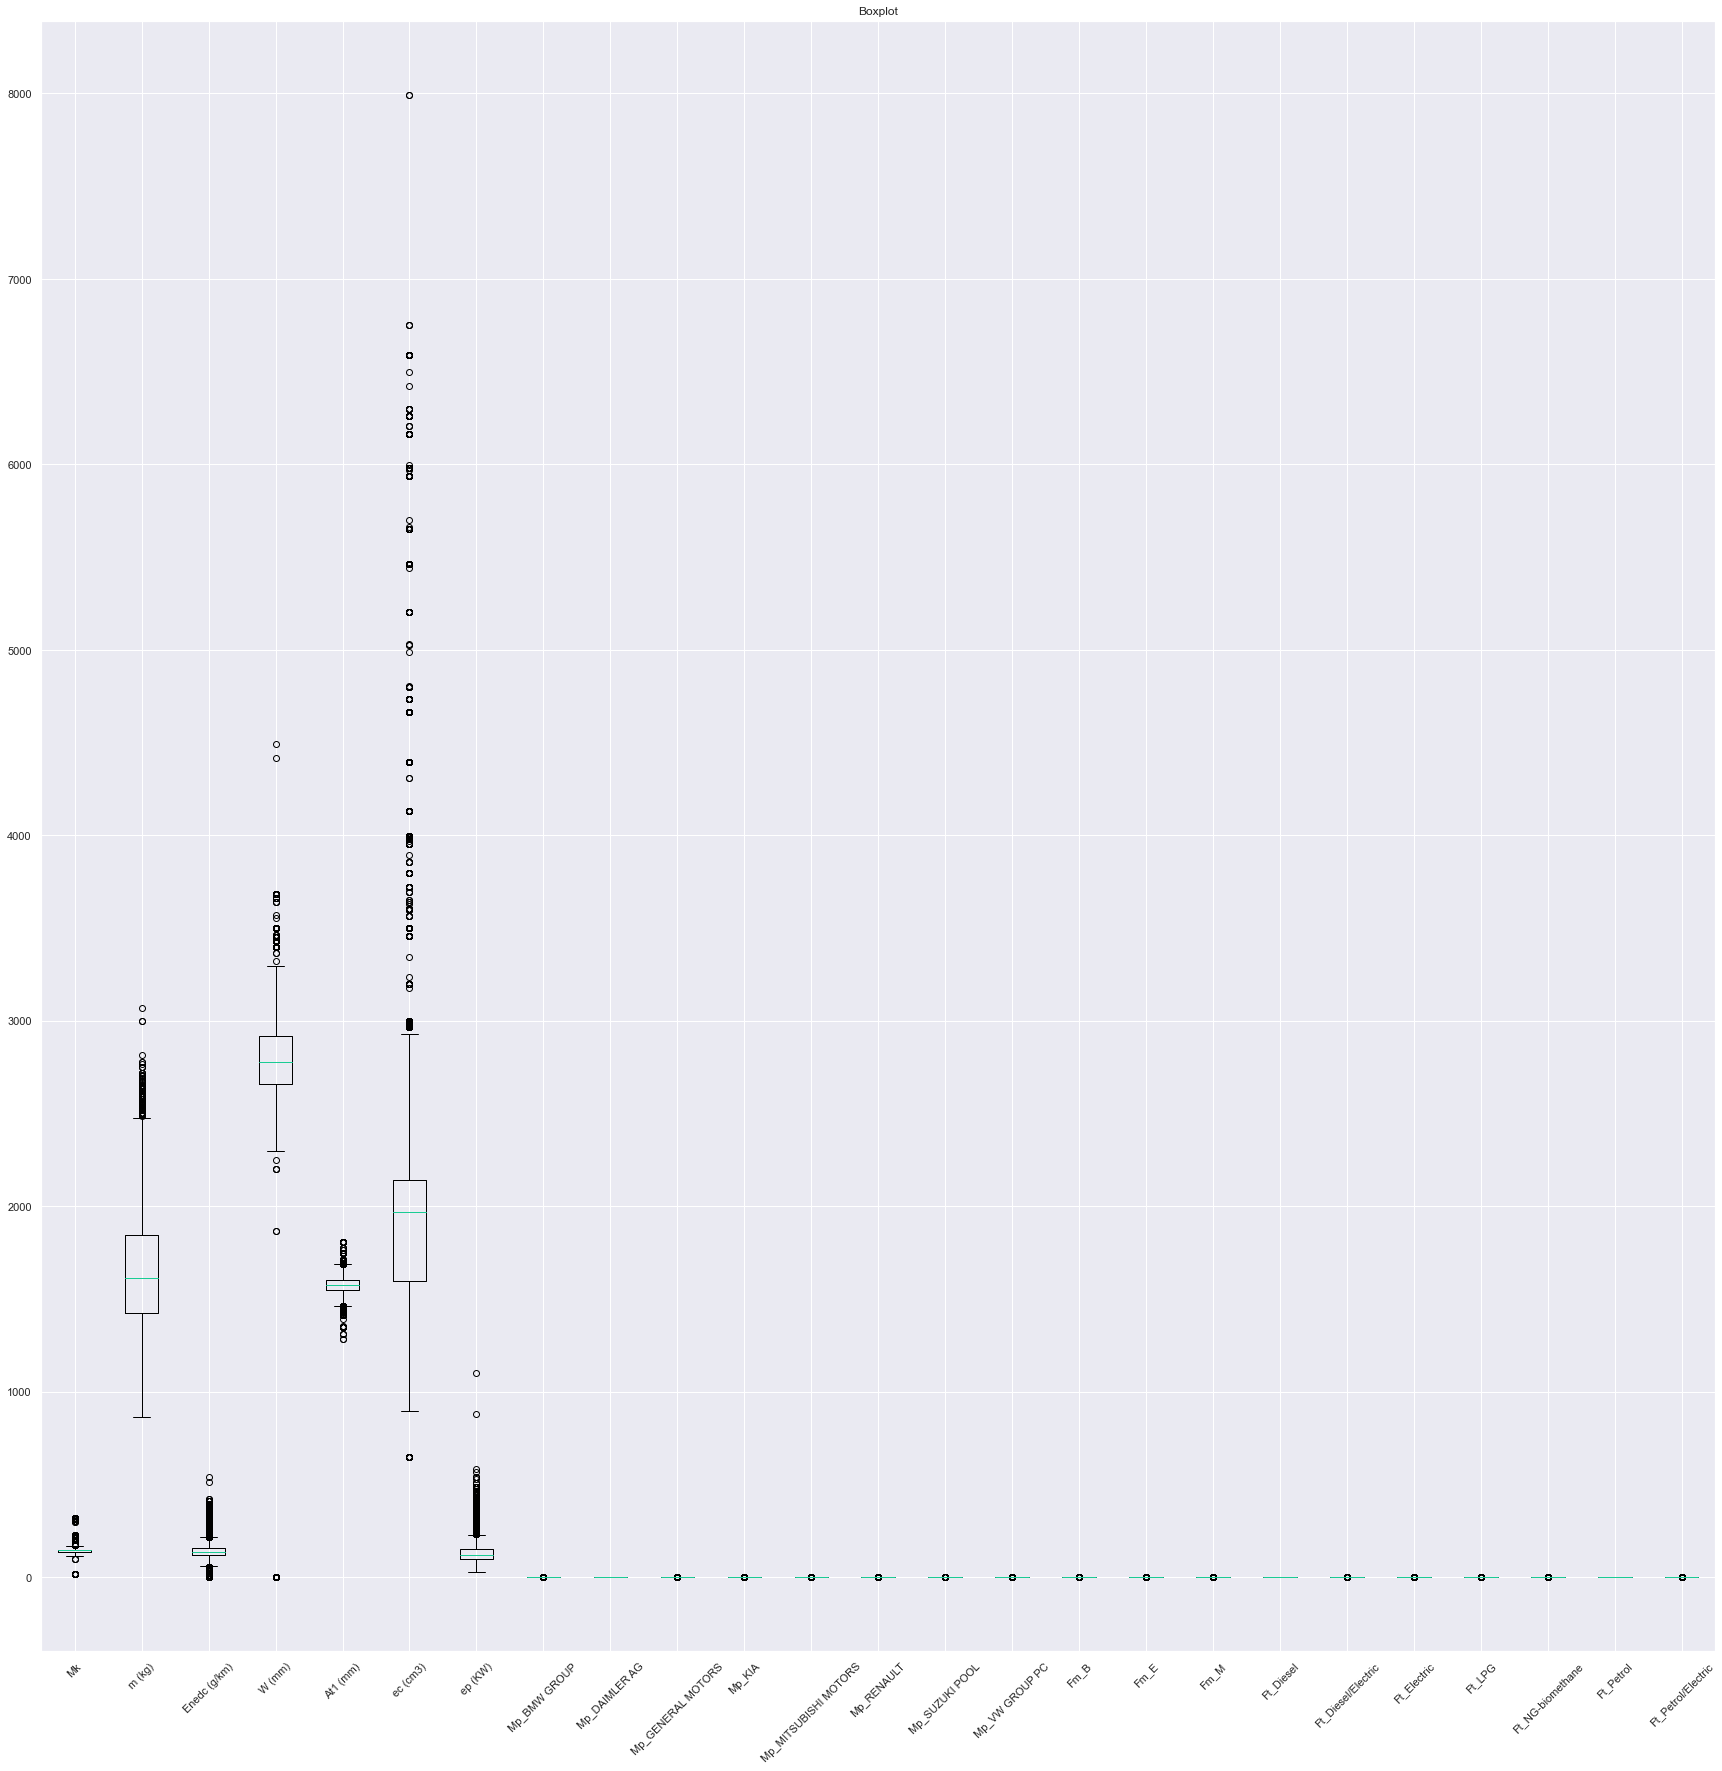

In [75]:
plt.figure(figsize=(30,30))
plt.title("Boxplot")
plt.boxplot(CO2_prep_enc,labels=CO2_prep_enc.columns,medianprops=dict(color="#1ACC94"))
plt.xticks(rotation=45)
plt.show()

In [76]:
# Zeros and Outliers to be processed

In [77]:
CO2_prep_enc['W (mm)'].value_counts()

2939.0    1545
2840.0    1533
2699.0    1441
3200.0    1187
0.0       1179
          ... 
3320.0       1
2612.0       1
2250.0       1
3570.0       1
2417.0       1
Name: W (mm), Length: 203, dtype: int64

In [78]:

CO2_prep_encf = CO2_prep_enc.replace({'W (mm)': {0: statistics.median(CO2_prep_enc['W (mm)'])}}) 
CO2_prep_encf['W (mm)'].value_counts()

2939.0    1545
2840.0    1533
2699.0    1441
2780.0    1275
3200.0    1187
          ... 
2417.0       1
2734.0       1
2686.0       1
2617.0       1
3552.0       1
Name: W (mm), Length: 202, dtype: int64

In [79]:
CO2_prep_encf['ec (cm3)'].describe()

count    19600.000000
mean      2026.173827
std        801.609398
min        647.000000
25%       1595.000000
50%       1968.000000
75%       2143.000000
max       7993.000000
Name: ec (cm3), dtype: float64

In [80]:
CO2_prep_encf2 = CO2_prep_encf.replace({'ec (cm3)': {7993: statistics.median(CO2_prep_encf['ec (cm3)'])}}) 
CO2_prep_encf2['ec (cm3)'].describe()

count    19600.000000
mean      2025.559031
std        799.340008
min        647.000000
25%       1595.000000
50%       1968.000000
75%       2143.000000
max       6749.000000
Name: ec (cm3), dtype: float64

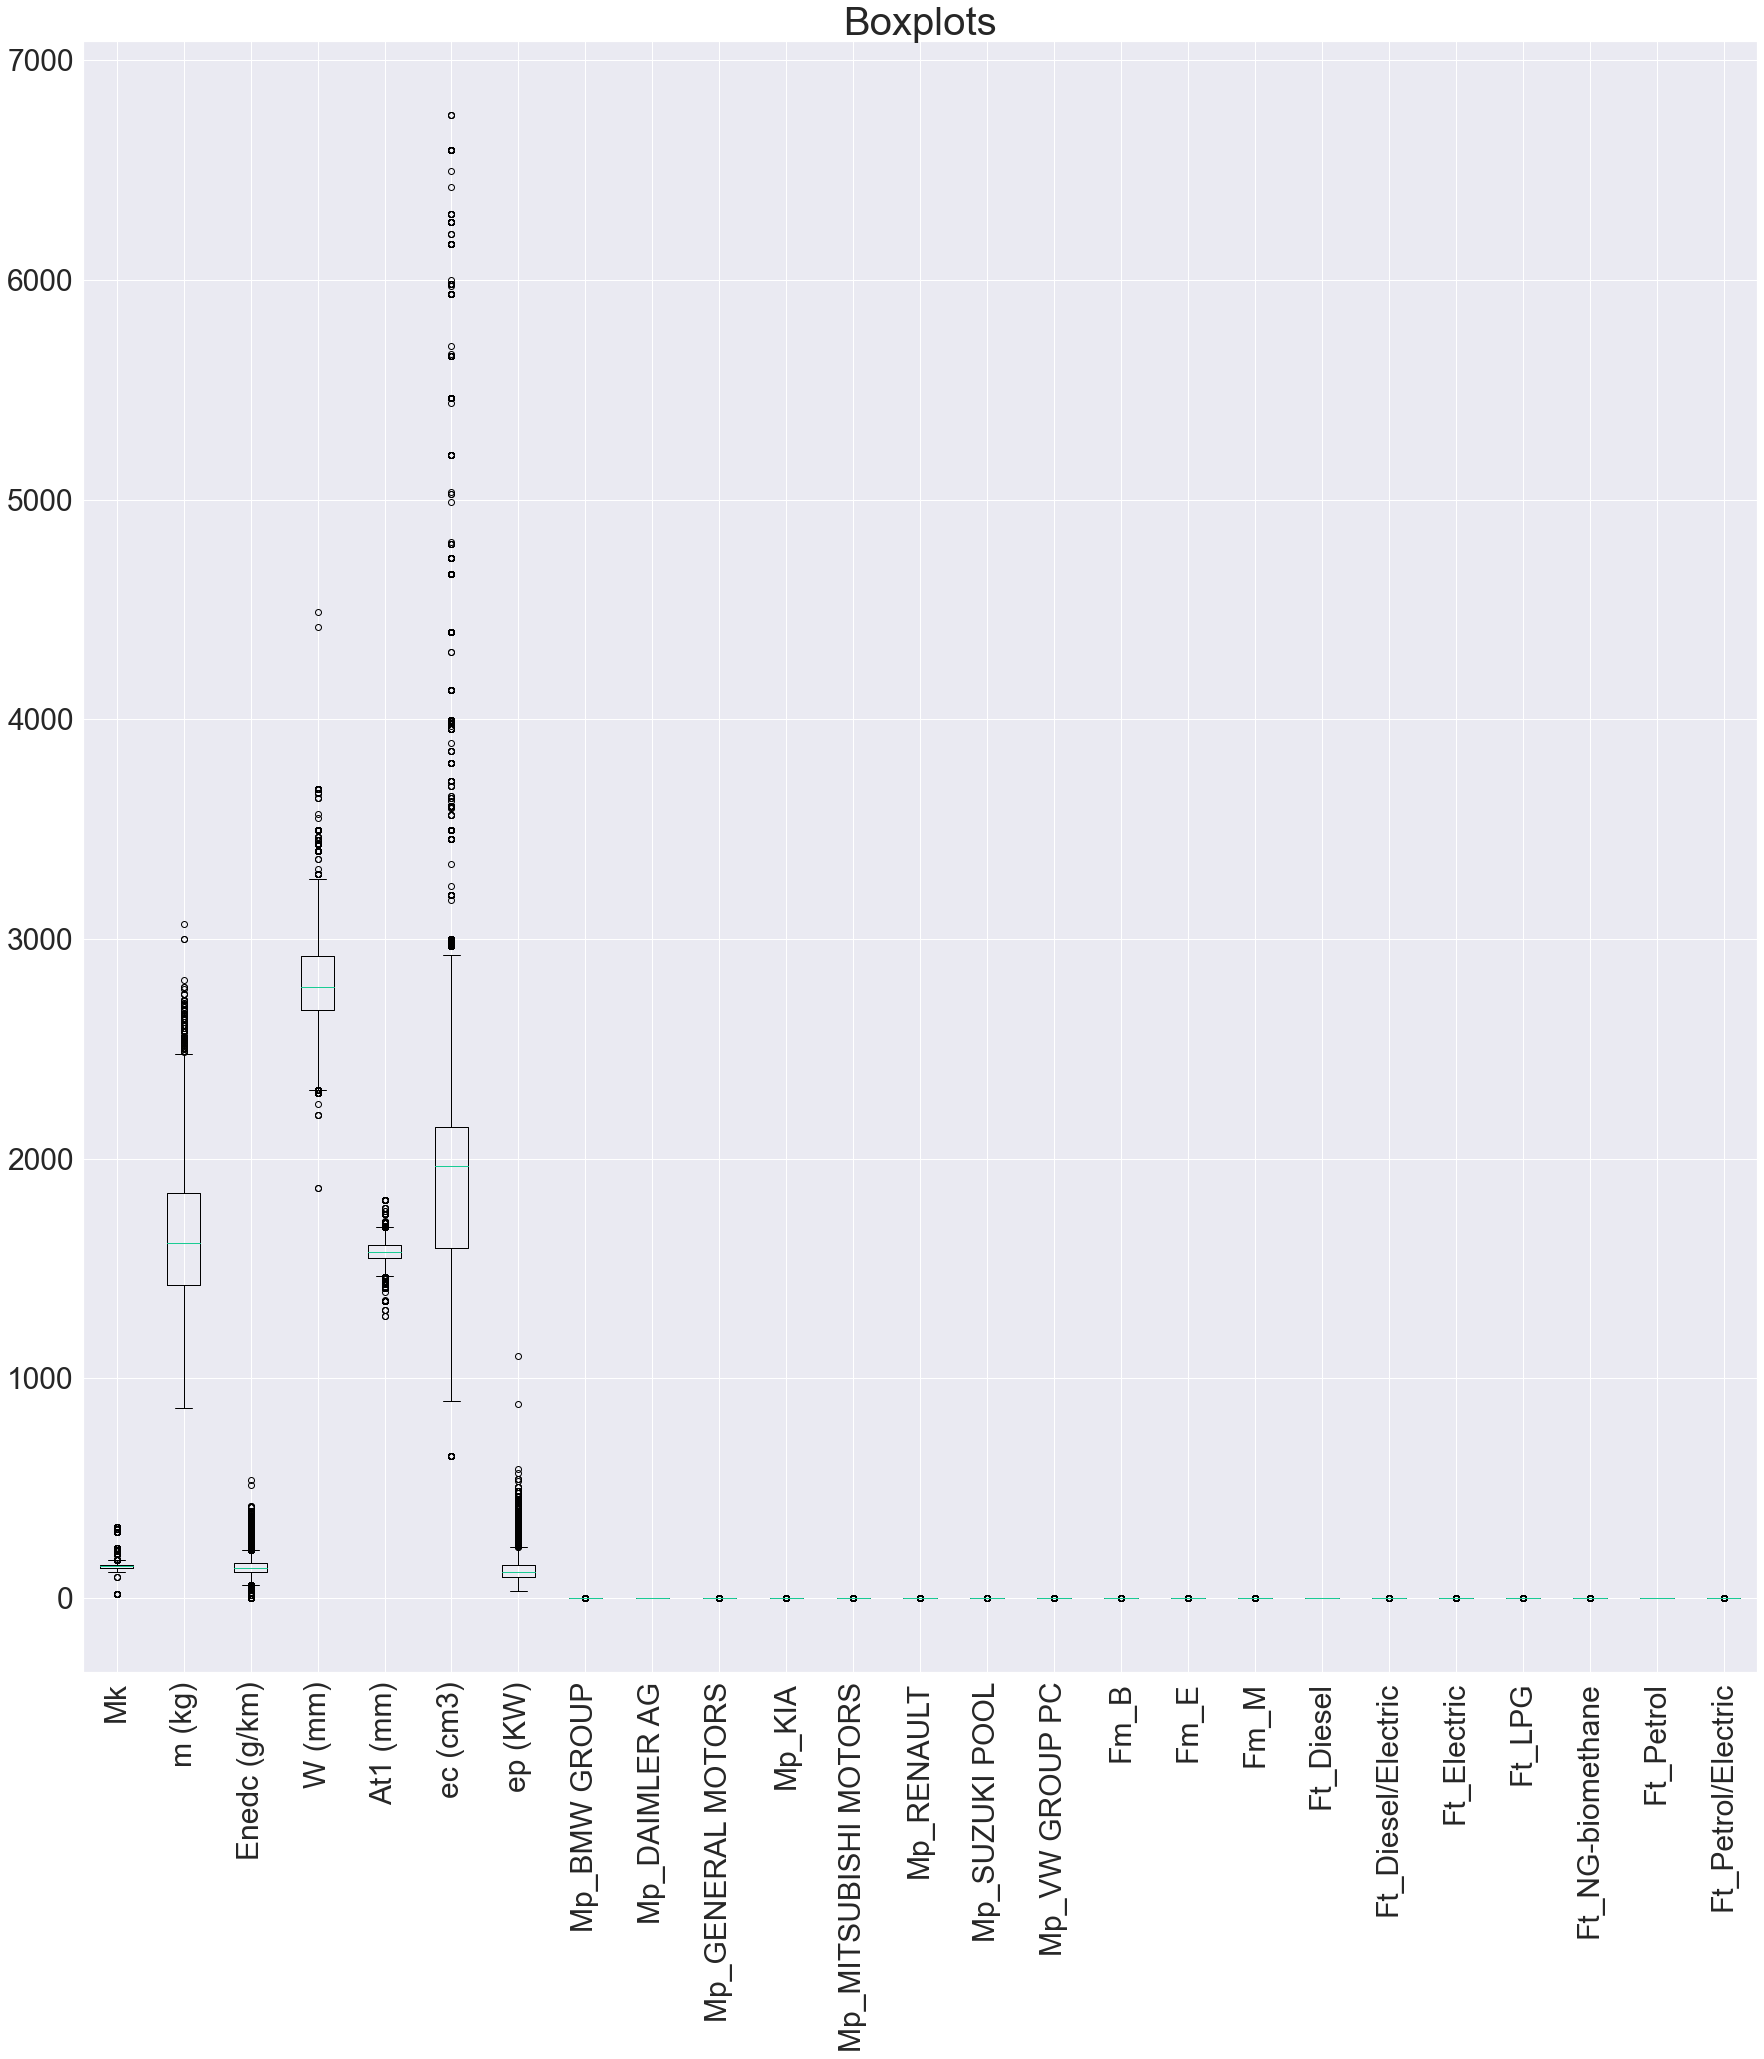

In [81]:
plt.figure(figsize=(30,30))
plt.title("Boxplots", fontsize=40)
plt.boxplot(CO2_prep_encf2,labels=CO2_prep_encf.columns, medianprops=dict(color="#1ACC94"))
plt.xticks(rotation=90, fontsize=30)
plt.yticks(fontsize=30)
plt.show()

/var/folders/5v/x5bgf8yj34q8c1bw3hrcktcm0000gn/T/ipykernel_10465/3074977504.py:4: UserWarning: To output multiple subplots, the figure containing the passed axes is being cleared.
  CO2_prep_encf2.hist(ax = ax)


array([[<AxesSubplot:title={'center':'Mk'}>,
        <AxesSubplot:title={'center':'m (kg)'}>,
        <AxesSubplot:title={'center':'Enedc (g/km)'}>,
        <AxesSubplot:title={'center':'W (mm)'}>,
        <AxesSubplot:title={'center':'At1 (mm)'}>],
       [<AxesSubplot:title={'center':'ec (cm3)'}>,
        <AxesSubplot:title={'center':'ep (KW)'}>,
        <AxesSubplot:title={'center':'Mp_BMW GROUP'}>,
        <AxesSubplot:title={'center':'Mp_DAIMLER AG'}>,
        <AxesSubplot:title={'center':'Mp_GENERAL MOTORS'}>],
       [<AxesSubplot:title={'center':'Mp_KIA'}>,
        <AxesSubplot:title={'center':'Mp_MITSUBISHI MOTORS'}>,
        <AxesSubplot:title={'center':'Mp_RENAULT'}>,
        <AxesSubplot:title={'center':'Mp_SUZUKI POOL'}>,
        <AxesSubplot:title={'center':'Mp_VW GROUP PC'}>],
       [<AxesSubplot:title={'center':'Fm_B'}>,
        <AxesSubplot:title={'center':'Fm_E'}>,
        <AxesSubplot:title={'center':'Fm_M'}>,
        <AxesSubplot:title={'center':'Ft_Diesel'}>,
    

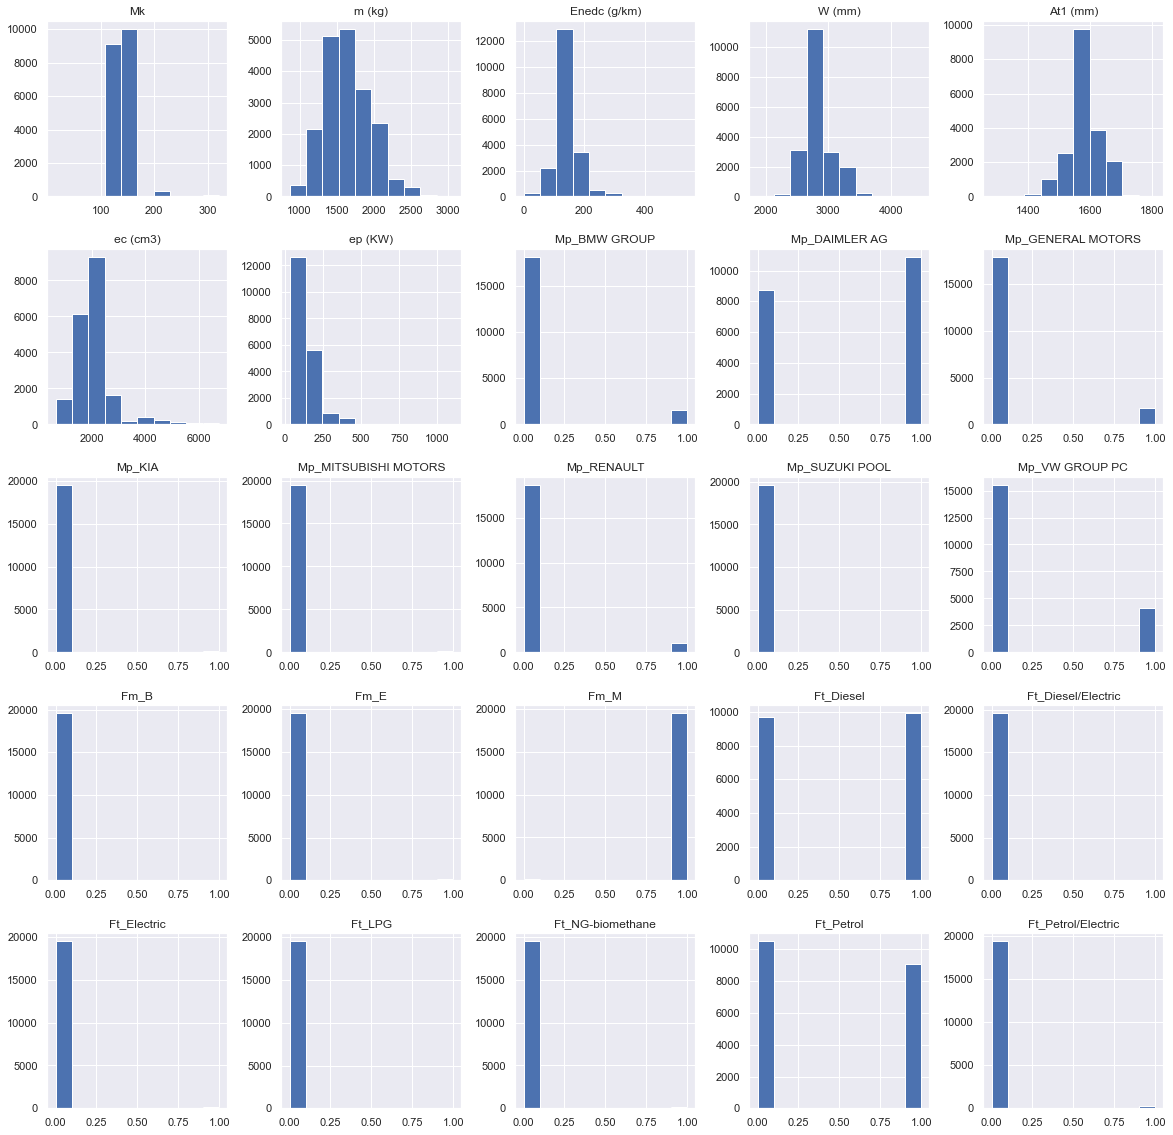

In [82]:
# New Histograms
fig = plt.figure(figsize = (20,20))
ax = fig.gca()
CO2_prep_encf2.hist(ax = ax)

In [83]:
CO2_prep_encf2.to_csv('preprocessed_dataframe.csv',index = False)